# Neural Network classification with PyTorch

**Classification** is a problems of predicting whether something is one thing or another (there can be multiple things as the options)

Refer to the book verison - https://www.learnpytorch.io/02_pytorch_classification/

## 1. Data

In [160]:
from sklearn.datasets import make_circles

# Make a 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)


In [161]:
len(X), len(y)

(1000, 1000)

In [162]:
print(f"Top 5 data points :\n {X[:5]}")
print(f"And there labels : \n {y[:5]}")

Top 5 data points :
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
And there labels : 
 [1 1 1 1 0]


In [163]:
# Make dataframe of circle data
import pandas as pd
circles = pd.DataFrame({ "X1" : X[:, 0],
                                      "X2" : X[:, 1],
                                     "label" : y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


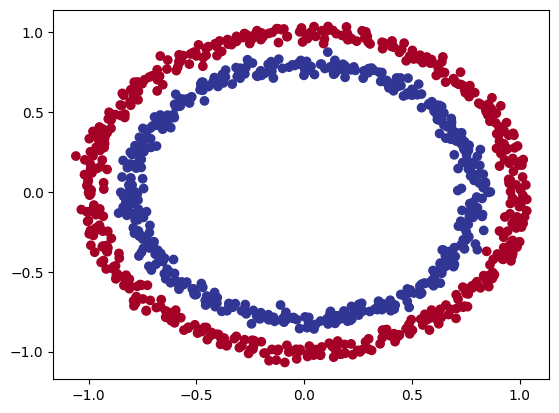

In [164]:
# Visualize, Visualize, Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:, 0],
                  y = X[:, 1],
                  c = y,
                  cmap = plt.cm.RdYlBu)

**Note** : The data we're working with it often reffered as a toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [165]:
X.shape , y.shape

((1000, 2), (1000,))

In [166]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [167]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X :\n {X_sample}\n and same for the y: \n {y_sample}")
print(f"Shapes for one sample of X :\n {X_sample.shape}\n and same for the y: \n {y_sample.shape}")

Values for one sample of X :
 [0.75424625 0.23148074]
 and same for the y: 
 1
Shapes for one sample of X :
 (2,)
 and same for the y: 
 ()


### 1.2 Turn data into tensors and create train and test split

In [168]:
import torch
print(torch.__version__)

2.9.0+cu126


In [169]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [170]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [171]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [172]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a Model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnoistic code so our code will run on the acceleartor (GPU) if there is one .

2. Construct a model ( by subclassing `nn.Module`)
3. Define a loss function and optimizer.
4. Creating a training and testing loop


In [173]:
# Import PyTorch and nn
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [174]:
device

'cuda'

Now we've setup agnoistic code, let's create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass)

2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data

3. Define Forward method `forward()` methods that outlines the forward pass ( or forward computation) of the model

4. Instantiate an instance of our model class and send it to target device

In [175]:
X_train.shape

torch.Size([800, 2])

In [176]:
# 1. Construct a Model that subclass `nn.Module`
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features=5)      # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)         # takes in 5 features from previous layer and outputs a single feature 1 (same shape as y)

   #3. Define the forward() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> Layer 1 -> Layer 2 -> output


# 4. Instantiate an instance of our model class and send it to target device
model_0 = CircleModelV0().to(device)




In [177]:
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [178]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [179]:
# Let's replicate the model above using nn.Sequential()
model_0 = nn.Sequential(

                        nn.Linear(in_features=2, out_features=5),
                        nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [180]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6231,  0.2968, -0.1061, -0.3239,  0.6074], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0997, -0.2474, -0.2264, -0.0214,  0.2497]], device='cuda:0')),
             ('1.bias', tensor([-0.1143], device='cuda:0'))])

In [181]:
X_train[: 10], X_test[: 10]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994],
         [-0.8837, -0.4678],
         [-0.3836,  0.6987],
         [ 0.6047,  0.5163],
         [-0.5869,  0.7804],
         [ 0.8833, -0.5178]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

### 2.1 Setup Loss Function and optimizer

Which loss function or optimizer should we use ?

Again..... This problem is problem specific:-

For example for **Regression** you might want MAE or MSE (mean absolute or mean squared error)

For **Classification** you might want binary cross entropy or categorical cross entropy (cross entropy)

As a reminder, the loss function measures how *wrong* your model predictions are.

And for optimizers, two of the most common and useful are SGD and Adam, however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss()`, for more on what binary cross entropy  (BCE) is, check out this article - https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

* For a definition on what a logit is in deep learning - https://stackoverflow.com/questions/41455101/what-is-the-meaning-of-the-word-logits-in-tensorflow

* For different optimizers see `torch.optim`

In [182]:
# Setup the loss function

# nn.Sequential(
#              nn.Sigmoid(),
#              nn.BCELoss()
# )    # It is same as BCEWithLogitsLoss

loss_fn = nn.BCEWithLogitsLoss()  #BCEWithLogitsLoss - sigmoid activation function built-in

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)


In [183]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [184]:
# Calculate accuracy - out of 100 examples, what percentage does our model get right ?
def accuracy_fn(y_true, y_pred):

  correct = torch.eq(y_true, y_pred).sum().item()

  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train model

To train our model, we're going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward  (backpropogation)
5. Optimizer (gradient descent)

### 3.1 Going from raw logits -> prediction probablities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them to some kind of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [185]:
# View the first 5 outputs of the forward pass on the test data.
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[: 5]
y_logits

tensor([[-0.1415],
        [-0.1357],
        [-0.0911],
        [-0.1561],
        [ 0.0132]], device='cuda:0')

In [186]:
y_test[: 5]

tensor([1., 0., 1., 0., 1.])

In [187]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [188]:
# Use sigmoid activation function on our model logits to turn them into prediction probabilities

y_pred_prob = torch.sigmoid(y_logits)
y_pred_prob

tensor([[0.4647],
        [0.4661],
        [0.4772],
        [0.4611],
        [0.5033]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_prob` >= 0.5,  `y=1` ( class 1)
*  `y_pred_prob` < 0.5,  `y=0` ( class 0)

In [189]:
# Find the predicted labels

y_preds = torch.round(y_pred_prob)

# In full

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[: 5]))

# Check for equality

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 1.], device='cuda:0')

### 3.2 Building a training and testing loop

In [190]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device

X_train, y_train = X_train.to(device),  y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)

# build training and evaluation loop

for epoch in range(epochs):

  # Training
  model_0.train()

  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits -> pred probs -> pred labels

  # Calculate loss / accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss Backward
  loss.backward()

  # Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward Pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/ accuarcy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch}, | Loss : {loss:.5f}, | Accuarcy : {acc:.2f}% | Test loss : {test_loss:.5f} |Test Acc : {test_acc:.2f}% ")



Epoch : 0, | Loss : 0.69443, | Accuarcy : 45.00% | Test loss : 0.69336 |Test Acc : 45.50% 
Epoch : 10, | Loss : 0.69395, | Accuarcy : 47.38% | Test loss : 0.69309 |Test Acc : 48.00% 
Epoch : 20, | Loss : 0.69367, | Accuarcy : 48.00% | Test loss : 0.69302 |Test Acc : 48.50% 
Epoch : 30, | Loss : 0.69349, | Accuarcy : 48.38% | Test loss : 0.69303 |Test Acc : 47.00% 
Epoch : 40, | Loss : 0.69337, | Accuarcy : 48.38% | Test loss : 0.69308 |Test Acc : 47.50% 
Epoch : 50, | Loss : 0.69328, | Accuarcy : 49.00% | Test loss : 0.69316 |Test Acc : 46.00% 
Epoch : 60, | Loss : 0.69321, | Accuarcy : 49.62% | Test loss : 0.69324 |Test Acc : 45.00% 
Epoch : 70, | Loss : 0.69316, | Accuarcy : 49.38% | Test loss : 0.69332 |Test Acc : 43.50% 
Epoch : 80, | Loss : 0.69313, | Accuarcy : 48.62% | Test loss : 0.69340 |Test Acc : 49.00% 
Epoch : 90, | Loss : 0.69310, | Accuarcy : 48.62% | Test loss : 0.69347 |Test Acc : 48.50% 


### Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it let's make some predictions and make the visual!

In other words "Visualize visualize visualize "..

To do so we're going to import a function called `plot_decison_boundry()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [191]:
import requests
from pathlib import Path

url = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"
file_path = Path("helper_functions.py")

if file_path.is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py...")
    response = requests.get(url)
    response.raise_for_status()  # safety check

    file_path.write_bytes(response.content)
    print("Download complete ✅")


helper_functions.py already exists, skipping download


In [192]:
from helper_functions import plot_decision_boundary, plot_predictions

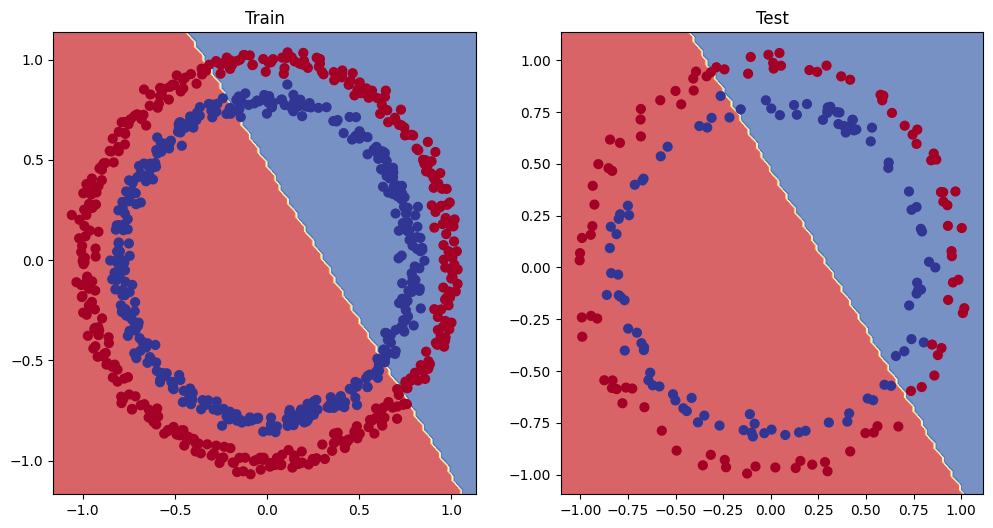

In [193]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### Improving a Model
Common ways to improve a deep model:-

* Adding layers
* Increasing the number of hidden units.
* Change/ add activation function
* Change the learning rate.
* Fitting for longer.
* Chnage the loss function

These options are all from a model's perspective because they deal directlly with the model, rather than the data.

And because these options are all values we (as a Machine Learning Enginners and Data Scientists) can change , they are referred as **hyperparamters**

In [194]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.5307,  0.6528],
                      [-0.5158,  0.3608],
                      [ 0.2516,  0.2123],
                      [-0.3821,  0.6425],
                      [ 0.1517,  0.1121]])),
             ('0.bias', tensor([-0.6179,  0.2859, -0.1170, -0.3243,  0.6203])),
             ('1.weight',
              tensor([[ 0.1277, -0.1972, -0.2179,  0.0185,  0.2853]])),
             ('1.bias', tensor([-0.0658]))])

In [195]:
class CircleModelV1(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))



In [196]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [197]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [198]:
loss_fn = nn.BCEWithLogitsLoss()  #BCEWithLogitsLoss - sigmoid activation function built-in

optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.01)


In [199]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device

X_train, y_train = X_train.to(device),  y_train.to(device)
X_test , y_test = X_test.to(device), y_test.to(device)

# build training and evaluation loop

for epoch in range(epochs):

  # Training
  model_1.train()

  # Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # turn logits -> pred probs -> pred labels

  # Calculate loss / accuracy
  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  # Optimizer zero grad
  optimizer.zero_grad()

  # Loss Backward
  loss.backward()

  # Optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():

    # 1. Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/ accuarcy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch}, | Loss : {loss:.5f}, | Accuarcy : {acc:.2f}% | Test loss : {test_loss:.5f} |Test Acc : {test_acc:.2f}% ")


Epoch : 0, | Loss : 0.69396, | Accuarcy : 50.88% | Test loss : 0.69430 |Test Acc : 50.00% 
Epoch : 10, | Loss : 0.69304, | Accuarcy : 49.50% | Test loss : 0.69429 |Test Acc : 46.50% 
Epoch : 20, | Loss : 0.69300, | Accuarcy : 50.00% | Test loss : 0.69499 |Test Acc : 45.50% 
Epoch : 30, | Loss : 0.69299, | Accuarcy : 50.12% | Test loss : 0.69456 |Test Acc : 46.50% 
Epoch : 40, | Loss : 0.69298, | Accuarcy : 51.00% | Test loss : 0.69470 |Test Acc : 45.00% 
Epoch : 50, | Loss : 0.69298, | Accuarcy : 51.00% | Test loss : 0.69468 |Test Acc : 45.00% 
Epoch : 60, | Loss : 0.69298, | Accuarcy : 51.38% | Test loss : 0.69468 |Test Acc : 45.50% 
Epoch : 70, | Loss : 0.69298, | Accuarcy : 51.38% | Test loss : 0.69467 |Test Acc : 46.00% 
Epoch : 80, | Loss : 0.69298, | Accuarcy : 51.38% | Test loss : 0.69469 |Test Acc : 45.50% 
Epoch : 90, | Loss : 0.69298, | Accuarcy : 51.25% | Test loss : 0.69467 |Test Acc : 45.50% 


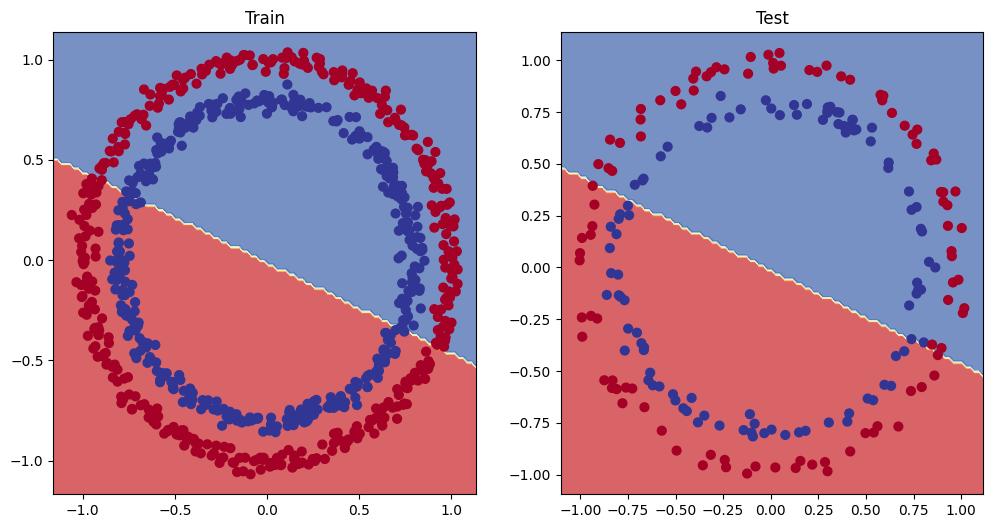

In [200]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### 5. Preparing data to see if our model can fit a straight single line

One way to troubleshoot to a larger problem is to test out a smaller problem

In [201]:
# Create some data (same as  notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias   # Linear Regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [202]:
# Create  train and test split
train_split = int(0.8* len(X_regression))
X_train_regression, y_train_regression = X_regression[: train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
print(len(X_train_regression))
print(len(y_train_regression))
print(len(X_test_regression))
print(len(y_test_regression))

80
80
20
20


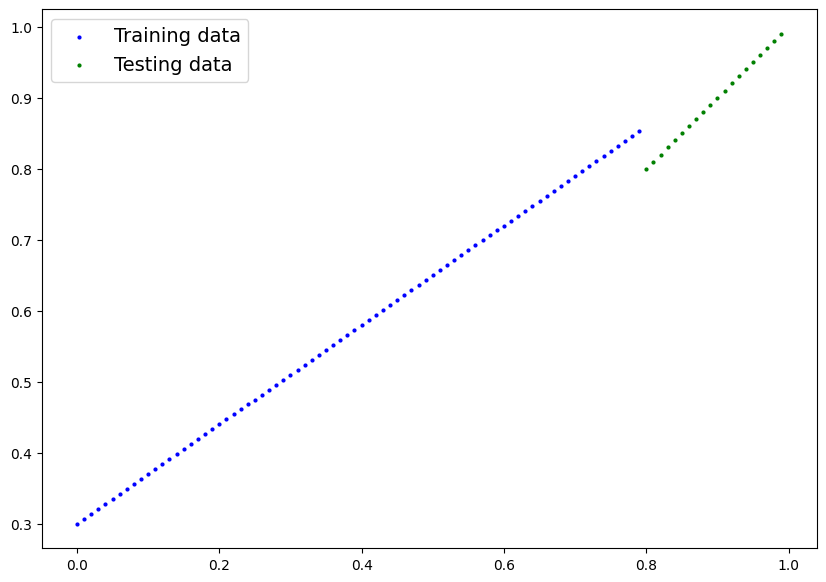

In [203]:
plot_predictions(train_data = X_train_regression, train_labels = y_train_regression, test_data = X_test_regression, test_labels = X_test_regression)

### 5.2 Adjust `model_1` to fit straight line

In [204]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

In [205]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [206]:
# Loss and Optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [207]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data into target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training
for epoch in  range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f} ")


Epoch: 0 | Loss: 0.75986 | Test_loss: 0.54143 
Epoch: 10 | Loss: 0.14550 | Test_loss: 0.02363 
Epoch: 20 | Loss: 0.14420 | Test_loss: 0.05597 
Epoch: 30 | Loss: 0.10136 | Test_loss: 0.03785 
Epoch: 40 | Loss: 0.07525 | Test_loss: 0.00984 
Epoch: 50 | Loss: 0.07625 | Test_loss: 0.02102 
Epoch: 60 | Loss: 0.10320 | Test_loss: 0.02754 
Epoch: 70 | Loss: 0.08643 | Test_loss: 0.01007 
Epoch: 80 | Loss: 0.06937 | Test_loss: 0.01326 
Epoch: 90 | Loss: 0.08678 | Test_loss: 0.03027 


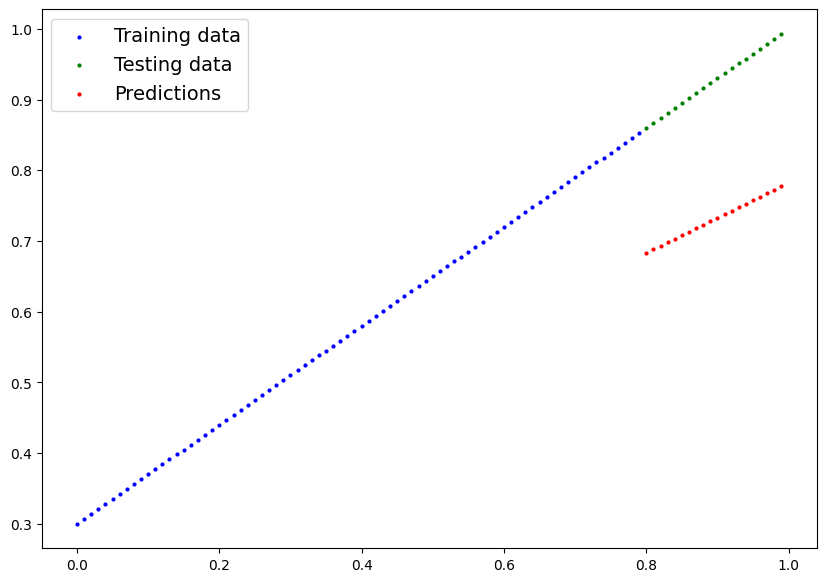

In [208]:
# Turn on evaluation model

model_2.eval()

# Make predictions(inference)

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot data and predictions

plot_predictions(train_data = X_train_regression.cpu(), train_labels =y_train_regression.cpu(), test_data = X_test_regression.cpu(), test_labels =y_test_regression.cpu(), predictions= y_preds.cpu() )

## 6. The missing piece : Non-linearity
"What patterns could you draw if you were giving an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite ) of linear  and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

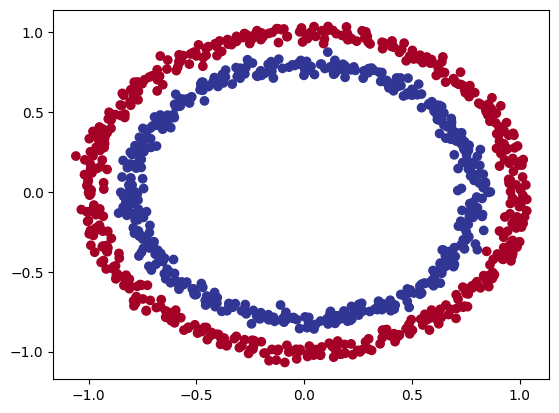

In [209]:
# Make and plot data.
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state = 42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [210]:
# Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into Tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train andtest sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity
* Linear - straight linear
* Non-linear - non-straigt lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which are potentially able to find patterns in data

In [211]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()  # relu is non-linear activation function

  def forward(self, x):
    #  Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)

In [212]:
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [213]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

In [214]:
# spam or not spam
# Credit cards = fraud or not fraud
# insurance claims = at fault or not fault

### 6.3 Training a model with non-linearity

In [215]:
# Random seedss
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# Pull all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data

In [216]:
# Loop through the data
epochs = 1000
for epoch in range(epochs):
  model_3.train()

  # 1. Forward Pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilites labels

  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)  # BCE with logits loss (takes logits as first input)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Step the optimizer
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred = test_pred)

  # Print out what;s happening
  if epoch % 100 == 0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc; {test_acc:.2f}%")


Epoch : 0 | Loss: 0.69295 | Acc: 50.00% | Test Loss: 0.6932 | Test Acc; 50.00%
Epoch : 100 | Loss: 0.69115 | Acc: 52.88% | Test Loss: 0.6910 | Test Acc; 52.50%
Epoch : 200 | Loss: 0.68977 | Acc: 53.37% | Test Loss: 0.6894 | Test Acc; 55.00%
Epoch : 300 | Loss: 0.68795 | Acc: 53.00% | Test Loss: 0.6872 | Test Acc; 56.00%
Epoch : 400 | Loss: 0.68517 | Acc: 52.75% | Test Loss: 0.6841 | Test Acc; 56.50%
Epoch : 500 | Loss: 0.68102 | Acc: 52.75% | Test Loss: 0.6794 | Test Acc; 56.50%
Epoch : 600 | Loss: 0.67515 | Acc: 54.50% | Test Loss: 0.6729 | Test Acc; 56.00%
Epoch : 700 | Loss: 0.66659 | Acc: 58.38% | Test Loss: 0.6632 | Test Acc; 59.00%
Epoch : 800 | Loss: 0.65160 | Acc: 64.00% | Test Loss: 0.6476 | Test Acc; 67.50%
Epoch : 900 | Loss: 0.62362 | Acc: 74.00% | Test Loss: 0.6215 | Test Acc; 79.00%


In [217]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01

###6.4 Evaluating a model trained with non-linear activation functions-

In [218]:
#Model predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

In [219]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.6760,  0.8035],
                      [-0.1997,  0.7568],
                      [-0.1549,  0.1427],
                      [-0.9637,  0.2292],
                      [ 0.5717, -1.3426],
                      [ 0.6689,  0.1840],
                      [ 0.7970,  0.2595],
                      [ 0.3410, -0.0998],
                      [ 0.6555,  0.3186],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3761, -0.2008, -0.2872,  0.2803, -0.4513, -0.3364, -0.3300, -0.4252,
                      -0.1989, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 1.3081e-01, -3.7347e-01,  2.4414e-01, -4.3348e-02, -2.7270e-01,
                        1.0512e-01, -4.7109e-02,  2.5550e-01, -4.9248e-02, -9.9730e-02],
                      [ 7.9469e-01,  3.8277e-01,  1.3309e-01,  7.5399e-01,  9.7241e-01,
                        2.6996e-01,  6.2185e-01

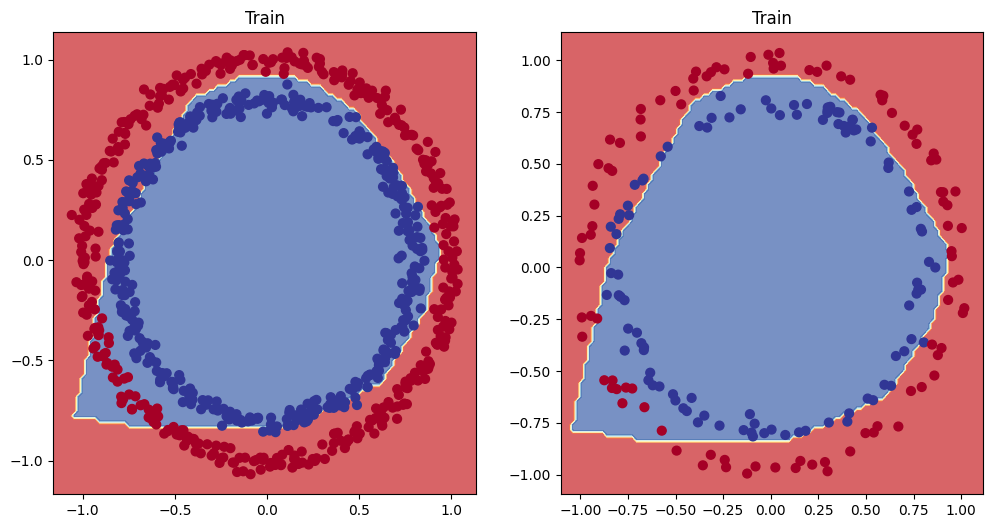

In [220]:
# Plot decison boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Train")
plot_decision_boundary(model_3, X_test, y_test)

## 7. Replacing non-linear activation function

Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns and it tries to figure out the patterns on its own

In [221]:
A = torch.arange(-10,10,1)
A.to(device)

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
          4,   5,   6,   7,   8,   9], device='cuda:0')

In [222]:
def relu(x):
  if x <= 0:
    return 0
  return x

In [223]:
def sigmoid(x):
  return 1/(1+ torch.exp(-x))

In [224]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

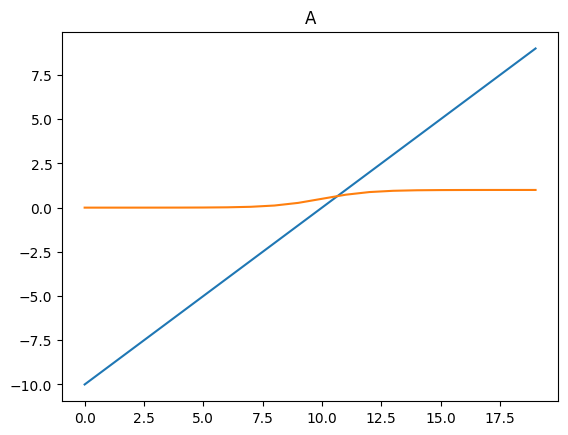

In [225]:
plt.title("A")
plt.plot(A)
plt.plot(sigmoid(A))

plt.show()

##8.1 Creating a toy multi-class dataset

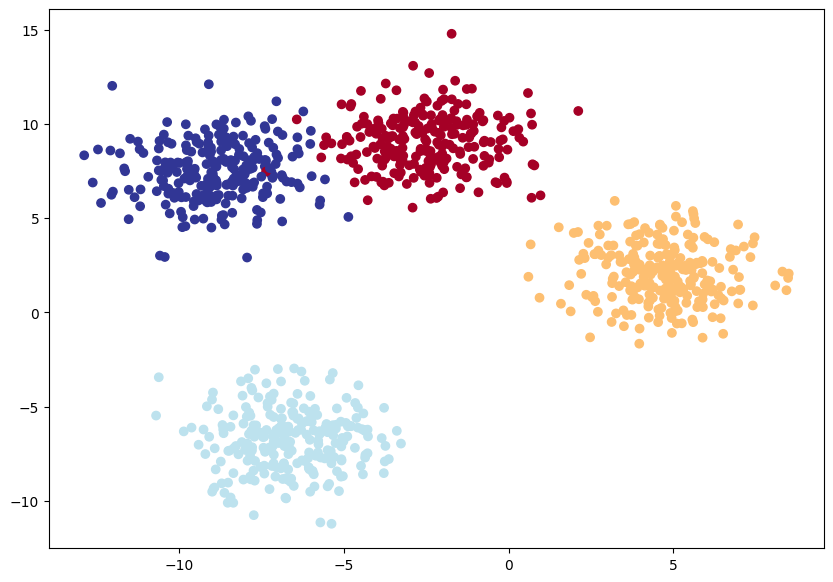

In [226]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


# Set the hyperparameters for the data creation
NUM_CLASSES=4
NUM_FEATURES = 2
RANDOM_SEED = 42


# 1. Create multi-classs data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

#2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

#4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)


###8.2 Building a Multi-Class classification model in PyTorch

In [227]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [228]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """Initializes multi-class classification model.

    Args:
    input_features(int): Number of input features to the model
    output_features(int):Number of outputs features (number of output classes)
    hidden_units(int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)

    )
  def forward(self, x):
    return self.linear_layer_stack(x)

#Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

###8.3 Create a loss_fn and optimizer for multi-class classification problem

In [229]:
# Create a loss function or multi-class classification

loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for the multi-class classification

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

###8.4 Getting prediction probabilities for multi-class PyTorch Model

In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels.

Logits(raw outputs of the model) --> Pred Probs(use `torch.softmax`) --> Pred labels (take the argmax of the prediction probabilities)

In [230]:
X_blob_train=X_blob_train.to(device)
y_blob_train=y_blob_train.to(device)
X_blob_test=X_blob_test.to(device)
y_blob_test=y_blob_test.to(device)

In [231]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)
y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

In [232]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [233]:
y_pred_probs = torch.softmax(y_logits,  dim=1)
print(y_pred_probs[:5])
print(y_logits[:5])

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')
tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')


In [234]:
y_pred_probs[0].sum()

tensor(1., device='cuda:0')

In [235]:
torch.argmax(y_pred_probs[0])

tensor(1, device='cuda:0')

In [236]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

In [237]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

###8.5 Creating a training and testing loop for multi-class PyTorch model.

In [238]:
# Fit the multi-class classification model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Loop through the data
for epoch in range(epochs):

  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)


  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

  if epoch%10 == 0:
    print(f"Epoch : {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc; {test_acc:.2f}%")






Epoch : 0 | Loss: 1.15883 | Acc: 40.38% | Test Loss: 1.0755 | Test Acc; 48.00%
Epoch : 10 | Loss: 0.64476 | Acc: 96.75% | Test Loss: 0.6607 | Test Acc; 97.50%
Epoch : 20 | Loss: 0.42535 | Acc: 98.50% | Test Loss: 0.4307 | Test Acc; 100.00%
Epoch : 30 | Loss: 0.25294 | Acc: 99.12% | Test Loss: 0.2451 | Test Acc; 99.50%
Epoch : 40 | Loss: 0.11232 | Acc: 99.25% | Test Loss: 0.1023 | Test Acc; 99.50%
Epoch : 50 | Loss: 0.06627 | Acc: 99.25% | Test Loss: 0.0585 | Test Acc; 99.50%
Epoch : 60 | Loss: 0.05068 | Acc: 99.25% | Test Loss: 0.0429 | Test Acc; 99.50%
Epoch : 70 | Loss: 0.04300 | Acc: 99.25% | Test Loss: 0.0349 | Test Acc; 99.50%
Epoch : 80 | Loss: 0.03836 | Acc: 99.25% | Test Loss: 0.0299 | Test Acc; 99.50%
Epoch : 90 | Loss: 0.03525 | Acc: 99.25% | Test Loss: 0.0266 | Test Acc; 99.50%


In [240]:
# Inference
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:5]


tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466]], device='cuda:0')

In [242]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [243]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

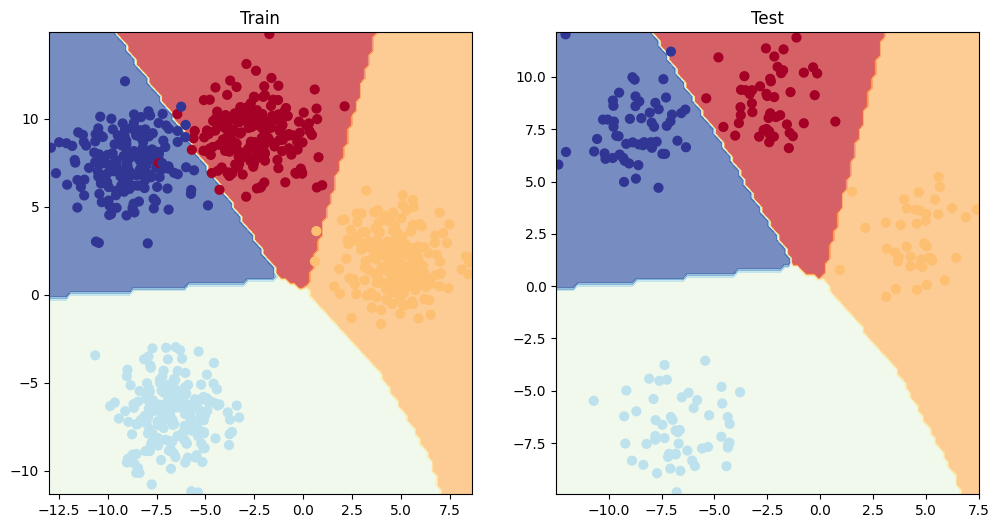

In [244]:
# Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

##9. A few more classification metrics.... (to evaluate our classification model)

* Accuracy
* Precison
* Recall
* F1-score
* Confusion matrix
* Classification report